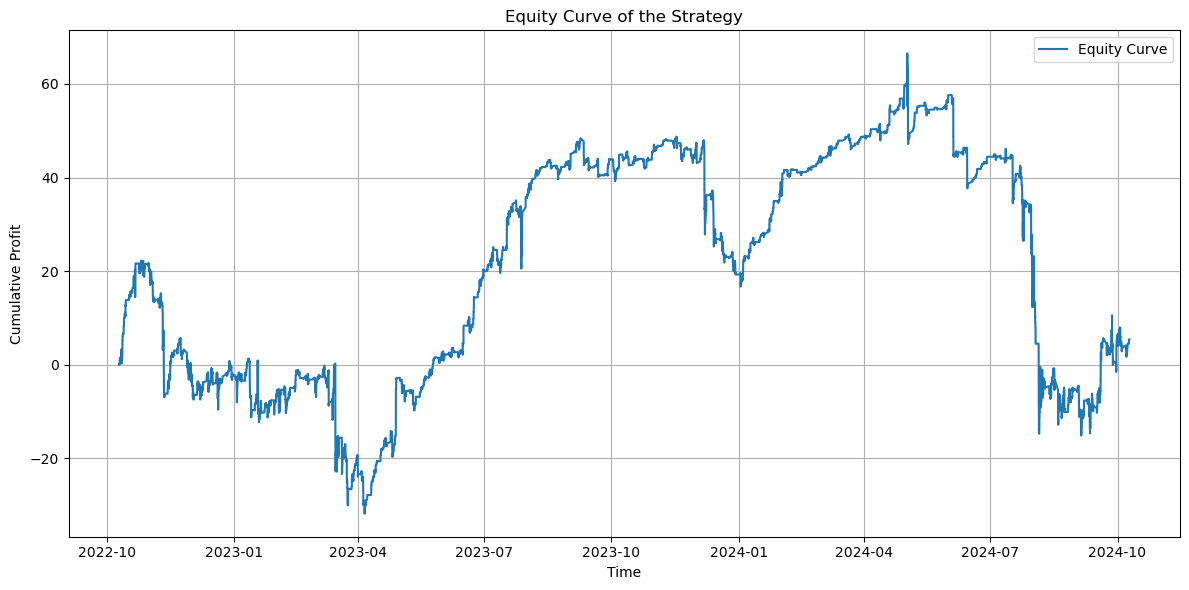

Maximum Drawdown: $-81.62
Maximum Drawdown Percentage: -2368.71%
Overall Sharpe Ratio: 0.26
Total Trades: 14266
Profitable Trades: 7361
Percentage Profitable Trades: 51.60%
Average Profit per Trade: $0.00
Highest Single Trade Profit: $2.73
Lowest Single Trade Profit: $-4.49


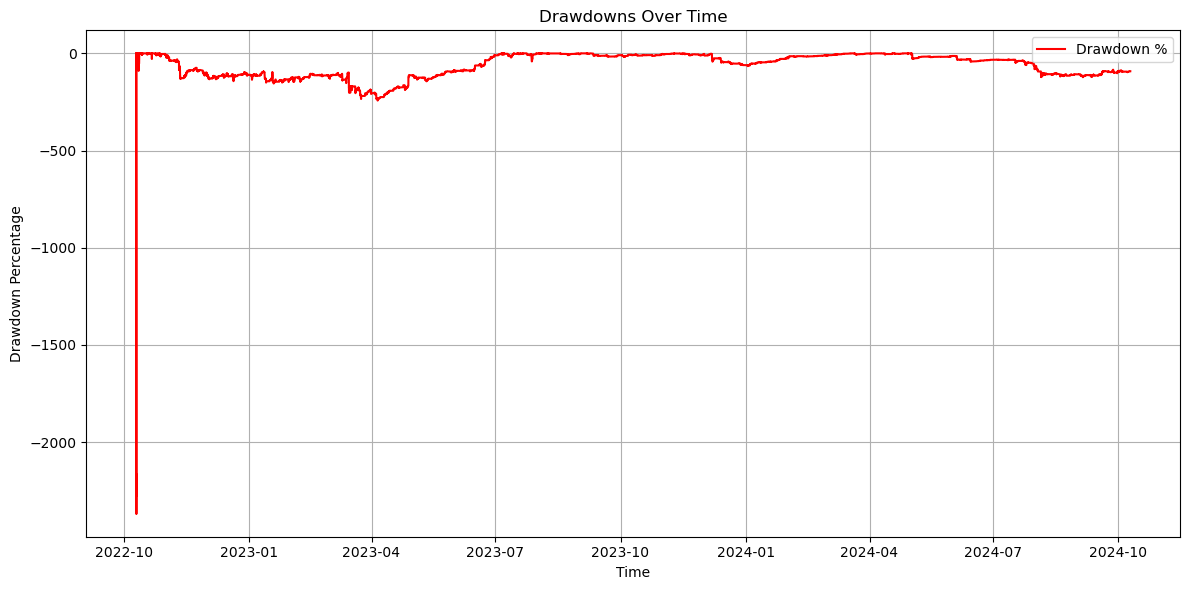

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the trades data
all_trades_df = pd.read_csv("all_trades.csv")

# Ensure that 'Entry_Time' and 'Exit_Time' are datetime objects
all_trades_df['Entry_Time'] = pd.to_datetime(all_trades_df['Entry_Time'], errors='coerce', utc=True)
all_trades_df['Exit_Time'] = pd.to_datetime(all_trades_df['Exit_Time'], errors='coerce', utc=True)

# Drop any rows with invalid datetime entries
all_trades_df = all_trades_df.dropna(subset=['Entry_Time', 'Exit_Time'])

# Sort trades by Entry_Time
all_trades_df.sort_values(by='Entry_Time', inplace=True)

# Calculate cumulative profit over time to estimate equity curve
all_trades_df['Cumulative Profit'] = all_trades_df['Profit'].cumsum()
all_trades_df['Cumulative Return %'] = all_trades_df['Profit_%'].cumsum()

# Plot the equity curve
def plot_equity_curve(trades_df):
    plt.figure(figsize=(12,6))
    plt.plot(trades_df['Entry_Time'], trades_df['Cumulative Profit'], label='Equity Curve')
    plt.xlabel('Time')
    plt.ylabel('Cumulative Profit')
    plt.title('Equity Curve of the Strategy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("equity_curve.png")
    plt.show()

plot_equity_curve(all_trades_df)

# Calculate drawdowns
def calculate_drawdowns(trades_df):
    cumulative_profit = trades_df['Cumulative Profit']
    running_max = cumulative_profit.cummax()
    drawdown = cumulative_profit - running_max
    drawdown_pct = (drawdown / running_max) * 100
    trades_df['Drawdown'] = drawdown
    trades_df['Drawdown %'] = drawdown_pct

    max_drawdown = drawdown.min()
    max_drawdown_pct = drawdown_pct.min()

    return max_drawdown, max_drawdown_pct

max_dd, max_dd_pct = calculate_drawdowns(all_trades_df)

print(f"Maximum Drawdown: ${max_dd:.2f}")
print(f"Maximum Drawdown Percentage: {max_dd_pct:.2f}%")

# Calculate overall Sharpe Ratio
def calculate_overall_sharpe_ratio(trades_df):
    returns = trades_df['Profit_%']
    mean_return = returns.mean()
    std_return = returns.std()
    sharpe_ratio = (mean_return / std_return) * np.sqrt(252) if std_return != 0 else 0  # Annualize
    return sharpe_ratio

overall_sharpe_ratio = calculate_overall_sharpe_ratio(all_trades_df)
print(f"Overall Sharpe Ratio: {overall_sharpe_ratio:.2f}")

# Calculate other performance metrics
total_trades = len(all_trades_df)
profitable_trades = all_trades_df[all_trades_df['Profit'] > 0]
num_profitable_trades = len(profitable_trades)
percent_profitable = (num_profitable_trades / total_trades) * 100 if total_trades > 0 else 0

average_profit_per_trade = all_trades_df['Profit'].mean()
highest_single_trade_profit = all_trades_df['Profit'].max()
lowest_single_trade_profit = all_trades_df['Profit'].min()

print(f"Total Trades: {total_trades}")
print(f"Profitable Trades: {num_profitable_trades}")
print(f"Percentage Profitable Trades: {percent_profitable:.2f}%")
print(f"Average Profit per Trade: ${average_profit_per_trade:.2f}")
print(f"Highest Single Trade Profit: ${highest_single_trade_profit:.2f}")
print(f"Lowest Single Trade Profit: ${lowest_single_trade_profit:.2f}")

# Plot Drawdowns
def plot_drawdowns(trades_df):
    plt.figure(figsize=(12,6))
    plt.plot(trades_df['Entry_Time'], trades_df['Drawdown %'], label='Drawdown %', color='red')
    plt.xlabel('Time')
    plt.ylabel('Drawdown Percentage')
    plt.title('Drawdowns Over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("drawdowns.png")
    plt.show()

plot_drawdowns(all_trades_df)
